In [1]:
import pandas as pd 
import numpy as np 

house_data = pd.read_csv("data.csv")

house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [2]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [3]:
house_data.nunique()

#drop street

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [4]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Whoa! Minimum price is zero!

In [5]:
house_data['price'].value_counts()

0.0         49
300000.0    42
400000.0    31
450000.0    29
600000.0    29
            ..
586500.0     1
693000.0     1
226500.0     1
257200.0     1
256000.0     1
Name: price, Length: 1741, dtype: int64

49 rows with a price of $0! The dataset is large enough that we can probably just drop these. 

In [6]:
house_data = house_data[house_data['price'] > 0]

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4551 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4551 non-null   float64
 3   bathrooms      4551 non-null   float64
 4   sqft_living    4551 non-null   int64  
 5   sqft_lot       4551 non-null   int64  
 6   floors         4551 non-null   float64
 7   waterfront     4551 non-null   int64  
 8   view           4551 non-null   int64  
 9   condition      4551 non-null   int64  
 10  sqft_above     4551 non-null   int64  
 11  sqft_basement  4551 non-null   int64  
 12  yr_built       4551 non-null   int64  
 13  yr_renovated   4551 non-null   int64  
 14  street         4551 non-null   object 
 15  city           4551 non-null   object 
 16  statezip       4551 non-null   object 
 17  country        4551 non-null   object 
dtypes: float

In [8]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## Feature Engineering

Something I noticed right away is that each house has a yr_built and yr_renovated feature. Perhaps creating a binary 'renovated' column may provide further insights

In [9]:
#create column 'renovated' with values 0 or 1, where 1 indicates that a house was renovated

house_data['renovated'] = house_data['yr_renovated'].apply(lambda x: 0 if (x == 0) else 1).astype('int64')

In [10]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,renovated
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1


## Visualizations 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 


Text(0.5, 1.0, 'Number of Renovated Houses')

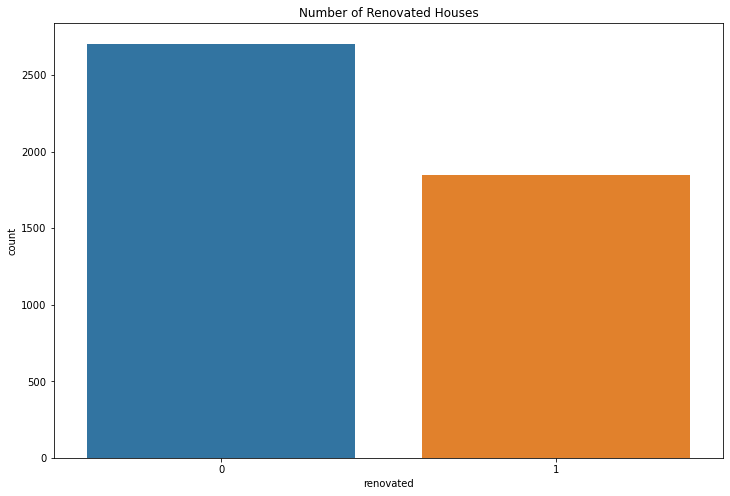

In [12]:
plt.figure(figsize=(12, 8))

sns.countplot(x='renovated', data=house_data)
plt.title("Number of Renovated Houses")

Text(0.5, 1.0, 'Distribution of House Prices')

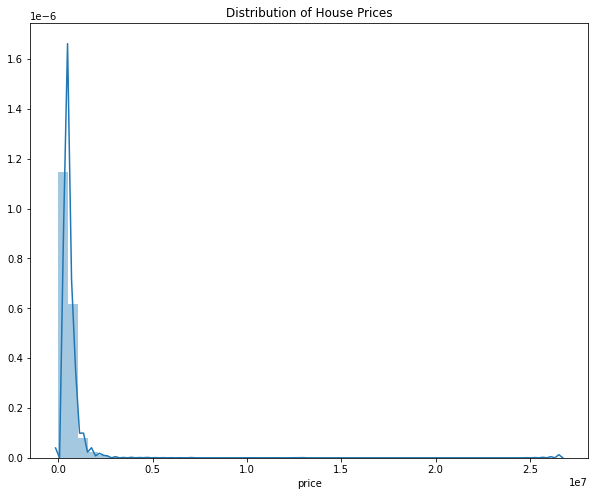

In [13]:
plt.figure(figsize=(10, 8))
sns.distplot(house_data.price, kde=True)
plt.title("Distribution of House Prices")

Text(0.5, 1.0, 'Distribution of House Square Footage')

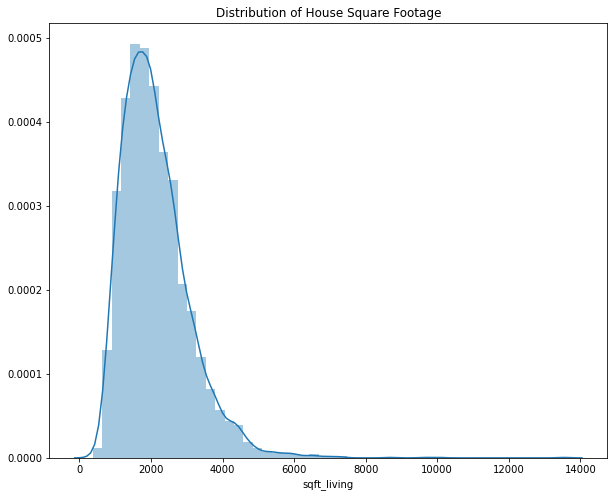

In [14]:
plt.figure(figsize=(10, 8))
sns.distplot(house_data.sqft_living, kde=True)
plt.title("Distribution of House Square Footage")

Text(0.5, 1.0, 'Distribution of Basement Square Footage')

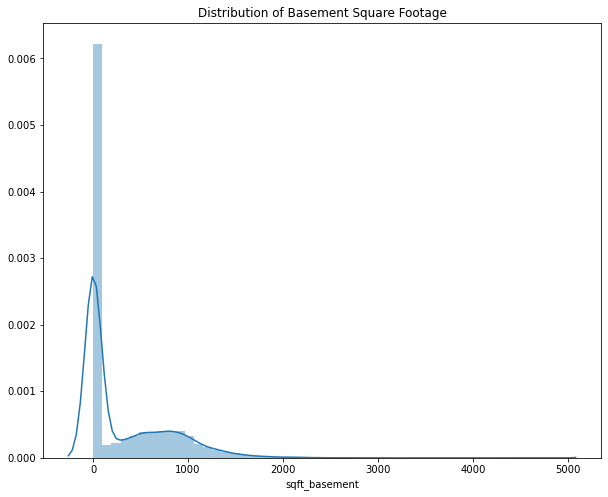

In [15]:
plt.figure(figsize=(10, 8))
sns.distplot(house_data.sqft_basement, kde=True)
plt.title("Distribution of Basement Square Footage")

Text(0.5, 1.0, 'Distribution of Lot Square Footage')

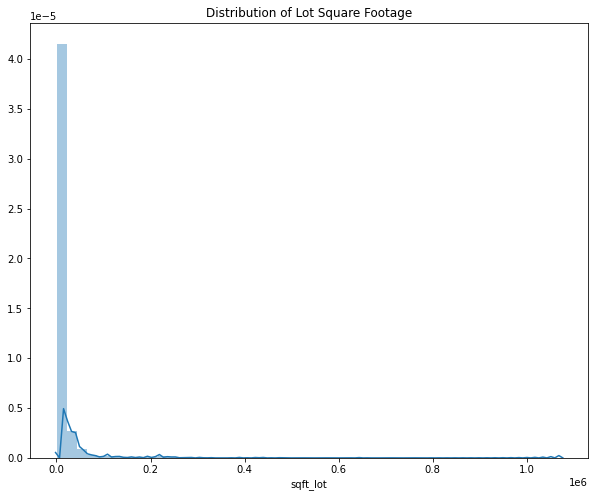

In [16]:
plt.figure(figsize=(10, 8))
sns.distplot(house_data.sqft_lot, kde=True)
plt.title("Distribution of Lot Square Footage")

Text(0.5, 1.0, 'Bedroom Counts')

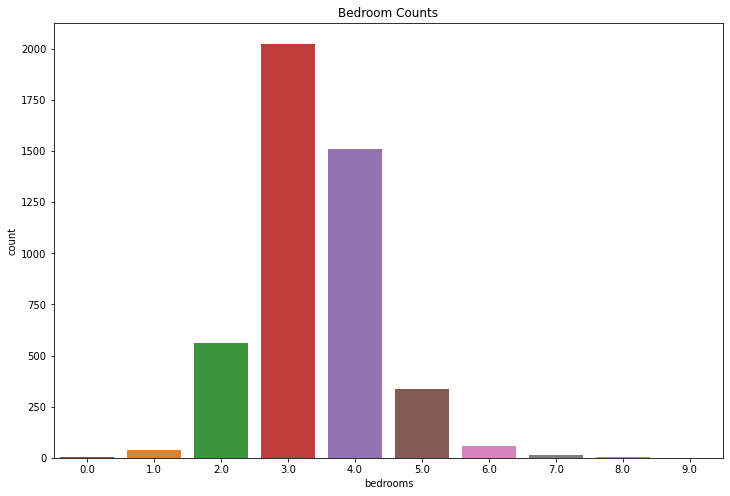

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(house_data.bedrooms)
plt.title("Bedroom Counts")

Text(0.5, 1.0, 'Bathroom Counts')

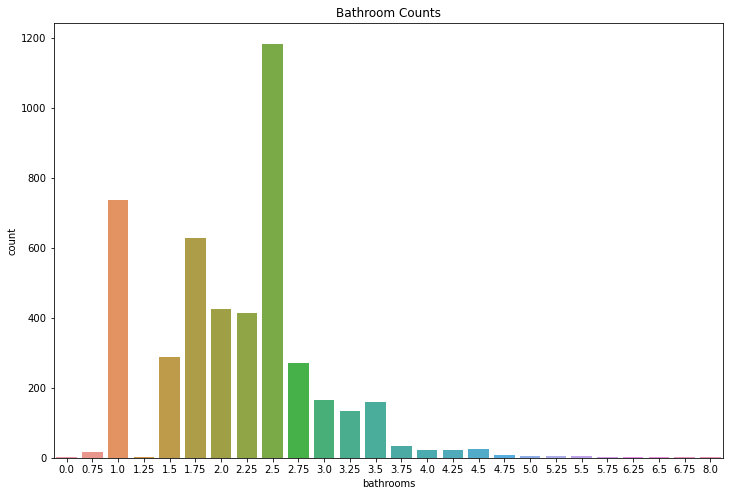

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(house_data.bathrooms)
plt.title("Bathroom Counts")

Text(0.5, 1.0, 'Floor Counts')

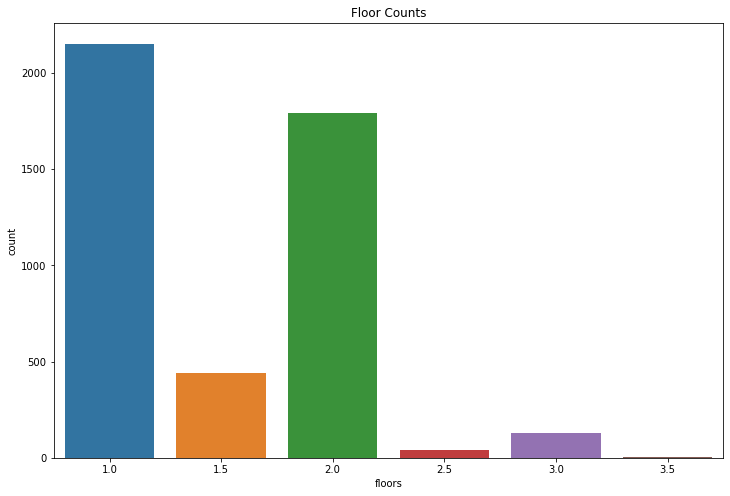

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(house_data.floors)
plt.title("Floor Counts")

Text(0.5, 1.0, 'Number of Houses with Waterfronts')

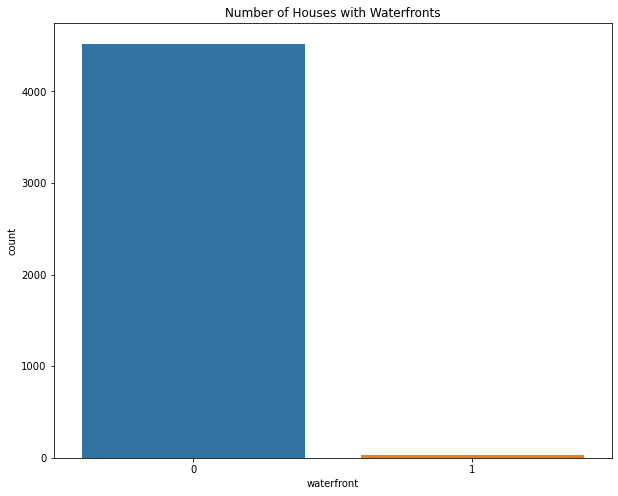

In [20]:
plt.figure(figsize=(10, 8))
sns.countplot(house_data.waterfront)
plt.title("Number of Houses with Waterfronts")

In [21]:
house_data['waterfront'].value_counts()

0    4521
1      30
Name: waterfront, dtype: int64

Only 30 homes in the dataset have a waterfront. 

Text(0.5, 1.0, 'View Counts')

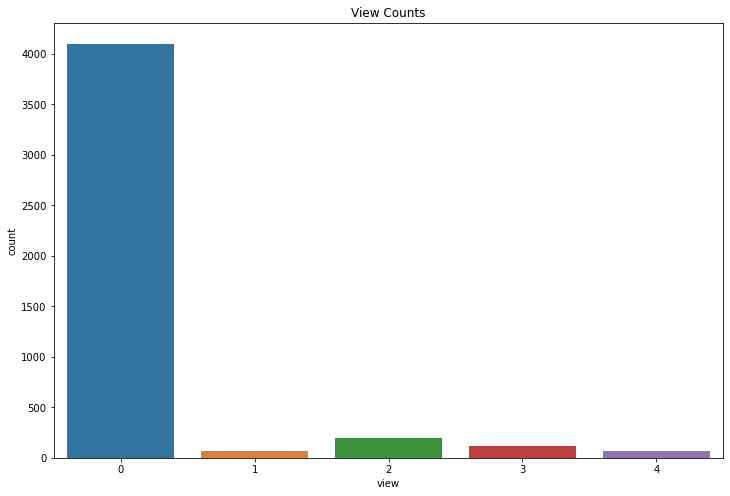

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(house_data.view)
plt.title("View Counts")

In [23]:
house_data['view'].value_counts()

0    4103
2     201
3     115
1      69
4      63
Name: view, dtype: int64

Unfortunately, there is no data description on the Kaggle page for this dataset. We can probably assume that view=0 indicates there is no notable view at the house. The values after that can either indicate the number of views or the quality of the views from the house.

Text(0.5, 1.0, '# of Floors Counts')

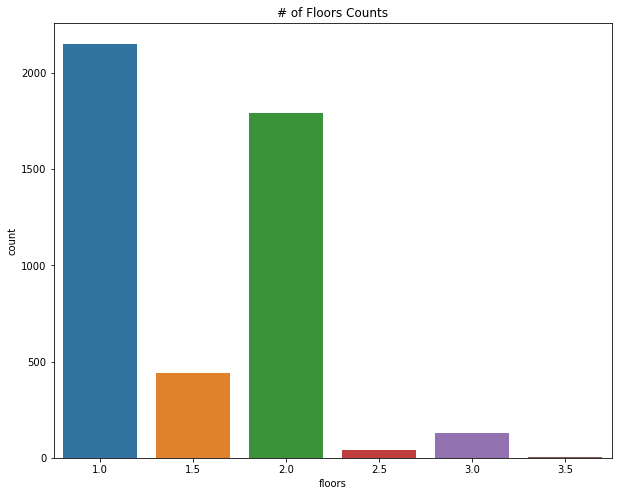

In [24]:
plt.figure(figsize=(10, 8))
sns.countplot(house_data.floors)
plt.title("# of Floors Counts")

Text(0.5, 1.0, 'Condition Counts')

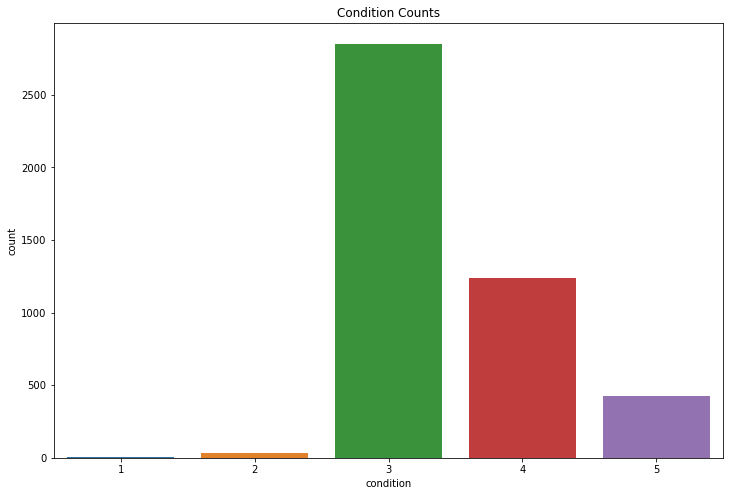

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(house_data.condition)
plt.title("Condition Counts")

In [26]:
house_data['condition'].value_counts()

3    2851
4    1238
5     425
2      31
1       6
Name: condition, dtype: int64

Most of the houses in the dataset have a condition value of 3+. This makes sense as there is less of a market for houses in bad condition (house flippers for example)

In [27]:
#remove country since all the houses are in the USA
house_data = house_data.drop('country', axis=1)

In [28]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,renovated
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,1


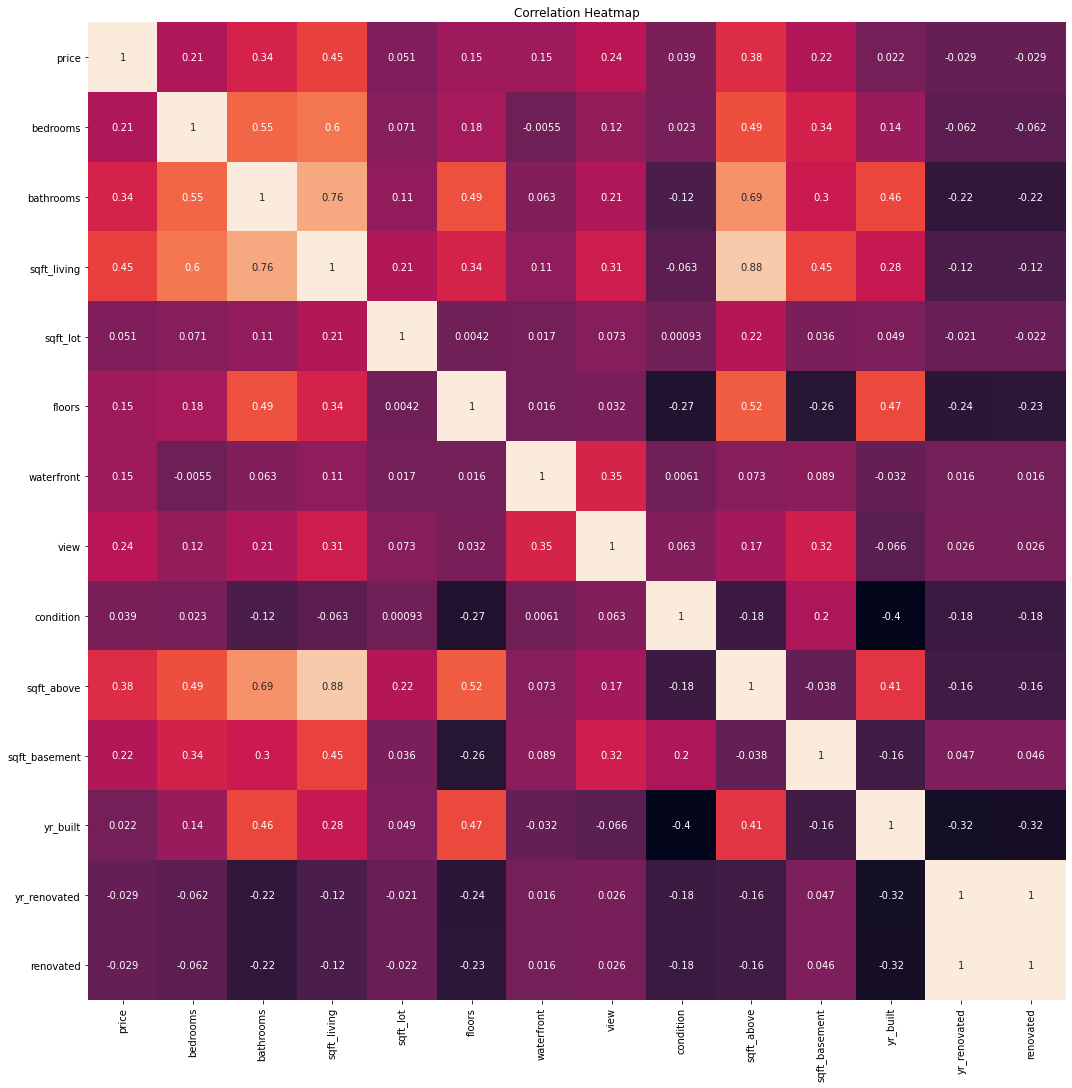

In [29]:
plt.figure(figsize=(15,20))
corr_matrix = house_data.corr()

sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True, cbar=False)
plt.title("Correlation Heatmap")
plt.tight_layout()

From this we can clearly see that the things we usually expect to affect a houses price (square footage, # of bedrooms/bathrooms, view, etc.) have highest influence on price. 

In [30]:
#drop date and street -- only 70 dates and the house price distribution is skewed left. Dropping street since there are almost as many streets as there are data points and may cause noise. 
house_data = house_data.drop(['date', 'street'], axis=1)


In [31]:
house_data.shape

(4551, 16)

In [32]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,1


## Split Data 

In [33]:
from sklearn.model_selection import train_test_split

X = house_data.drop(['price'], axis=1)
y=np.log1p(house_data['price'])

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=99)

## Pipeline

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer


categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() <7 or X_train[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64'] and X_train[cname].nunique() > 7]

#remove year built and year renovated from numerical cols
numerical_cols.remove('yr_built')
numerical_cols.remove('yr_renovated')

#add them to cat cols
categorical_cols.extend(['yr_built', 'yr_renovated'])

In [35]:
numerical_transformer = Pipeline([('scaler', PowerTransformer())])

categorical_transformer = Pipeline([('cat_enc', OneHotEncoder(handle_unknown = 'ignore'))])


preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Model Building

## Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

linreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('scaler', MaxAbsScaler()),
                                  ('model', model)])


linreg_pipeline.fit(X_train, y_train)

linreg_preds = linreg_pipeline.predict(X_val)

mse = mean_squared_error(y_val, linreg_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, linreg_preds)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 Score: ", r2)


MSE:  0.07796779207280875
RMSE:  0.27922713348241923
R2 Score:  0.7342410388847478


Since we used OneHotEncoder, we have a ton of features that were created to encode the categorical columns. Usually, we could just look at coef_ of the model to see the weights of each feature. However, the resulting output after using OneHotEncoder is impossible to interpret since we do not know the names of the features created. 

In [37]:
linreg_pipeline.steps[2][1].coef_

array([ 2.54572380e-01,  8.69867444e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.06049057e-03, -1.13776557e-01, -7.58019406e-02,
       -6.10896083e-02,  2.11863495e-02, -2.51248226e-01,  4.80729982e-01,
       -1.84154146e-01,  1.84154146e-01, -2.83480790e-01, -4.94928585e-02,
       -2.48748031e-02,  1.31197367e-01,  2.26651084e-01, -2.02430620e-01,
       -1.73338984e-01,  7.02242058e-02,  1.14875474e-01,  1.90669923e-01,
       -4.55200926e-01, -2.04887656e-01,  2.49967381e-02,  3.03639567e-01,
       -7.02575585e-02, -1.36345121e-01, -8.98715067e-02,  2.66110636e-03,
        5.25221128e-01, -4.14033821e-01,  2.70345302e-02, -7.60315707e-02,
       -2.16657630e-01,  9.50739740e-02, -2.87814803e-01,  2.19203451e-02,
       -1.87073939e-02,  1.77896777e-01, -2.31769929e-01,  1.51694726e-01,
        9.07366164e-02, -1.76025367e-01,  5.36735426e-01,  3.19658251e-01,
       -6.42368872e-02,  1.65478034e-01,  1.76480249e-01, -9.04150837e-02,
       -3.08594053e-01,  

After some research, I was able to find  [this](https://katstam.com/regression-feature_importance/) post online which describes step by step how to overcome this issue. 

First, we need to get the OneHotEncoder column names from the pipeline. 

In [38]:
onehot_columns = list(linreg_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['cat_enc'].get_feature_names(input_features=categorical_cols))

In [39]:
onehot_columns

['floors_1.0',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0',
 'floors_3.5',
 'waterfront_0',
 'waterfront_1',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'city_Algona',
 'city_Auburn',
 'city_Beaux Arts Village',
 'city_Bellevue',
 'city_Black Diamond',
 'city_Bothell',
 'city_Burien',
 'city_Carnation',
 'city_Clyde Hill',
 'city_Covington',
 'city_Des Moines',
 'city_Duvall',
 'city_Enumclaw',
 'city_Fall City',
 'city_Federal Way',
 'city_Inglewood-Finn Hill',
 'city_Issaquah',
 'city_Kenmore',
 'city_Kent',
 'city_Kirkland',
 'city_Lake Forest Park',
 'city_Maple Valley',
 'city_Medina',
 'city_Mercer Island',
 'city_Milton',
 'city_Newcastle',
 'city_Normandy Park',
 'city_North Bend',
 'city_Pacific',
 'city_Preston',
 'city_Ravensdale',
 'city_Redmond',
 'city_Renton',
 'city_Sammamish',
 'city_SeaTac',
 'city_Seattle',
 'city_Shoreline',
 'city_Skykomish',
 'city_Snoqualmie

Next, we join the lists of numerical columns and the onehot columns. 

In [40]:
features_list = list(numerical_cols)
features_list.extend(onehot_columns)

Finally, we can use the ELI5 ('explain like I'm 5') library to see the weights.

In [41]:
import eli5

eli5.explain_weights(linreg_pipeline.named_steps['model'], top=50, feature_names=features_list, feature_filter=lambda x: x != '<BIAS>')

Weight?,Feature
+0.870,bathrooms
+0.603,yr_renovated_1958
+0.542,statezip_WA 98004
+0.537,statezip_WA 98039
+0.537,city_Medina
+0.525,city_Clyde Hill
+0.518,statezip_WA 98109
+0.511,statezip_WA 98112
+0.481,floors_3.5
+0.480,statezip_WA 98105


The result is an easy to interpret list of all the features and their weights. Positive weights color-coded green and negative, red. From this it is easy to see which features affect a house's price the most. 

### Random Forest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)

rf_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                ('scaler', MaxAbsScaler()),
                                ('model', model)])

rf_pipeline.fit(X_train, y_train)

rf_preds = rf_pipeline.predict(X_val)



mse = mean_squared_error(y_val, rf_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, rf_preds)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 Score: ", r2)

MSE:  0.0866147309125494
RMSE:  0.2943038071662502
R2 Score:  0.7047673110571


### Grid Search

In [57]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 250, 500, 1000],
    'criterion' : ['mse'],
    'max_depth' : [None, 5, 10, 20],
    'min_samples_split' : [2, 4, 8],
    'min_samples_leaf' : [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)

grid_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('scaler', MaxAbsScaler()),
                                ('model', grid_search)])


grid_pipeline.fit(X_train, y_train)

print(f"Best score is {-1*grid_search.best_score_}")
print(f"Best parameters: \n{grid_search.best_params_}")

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 27.8min finished
Best score is -0.6496440181521239
Best parameters: 
{'criterion': 'mse', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1000}


In [58]:
best_grid = grid_search.best_estimator_

best_grid_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('scaler', MaxAbsScaler()),
                                     ('model', best_grid)])

best_grid_pipeline.fit(X_train, y_train)

best_pipeline_preds = best_grid_pipeline.predict(X_val)


mse = mean_squared_error(y_val, best_pipeline_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, best_pipeline_preds)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 Score: ", r2)

MSE:  0.08515735244212536
RMSE:  0.2918173271793938
R2 Score:  0.7097348929002532


In [ ]:
After grid search, the RF only performs slightly better than before (and still slightly worse than Linear Regression)

In [59]:
eli5.explain_weights(best_grid_pipeline.named_steps['model'], top=50, feature_names=features_list, feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.3132 ± 0.0419,bathrooms
0.0463 ± 0.0334,view_0
0.0428 ± 0.0259,sqft_basement
0.0404 ± 0.0144,city_Seattle
0.0322 ± 0.0119,bedrooms
0.0259 ± 0.0144,city_Kent
0.0231 ± 0.0092,city_Auburn
0.0231 ± 0.0132,city_Bellevue
0.0228 ± 0.0080,city_Federal Way
0.0219 ± 0.0174,statezip_WA 98004


In [77]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(loss_function='RMSE')

catboost_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                      ('scaler', MaxAbsScaler()),
                                      ('model', model)])

catboost_pipeline.fit(X_train, y_train)

catboost_preds = catboost_pipeline.predict(X_val) 

mse = mean_squared_error(y_val, catboost_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, catboost_preds)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 Score: ", r2)

maining: 1.01s
617:	learn: 0.2290227	total: 1.64s	remaining: 1.01s
618:	learn: 0.2289337	total: 1.64s	remaining: 1.01s
619:	learn: 0.2288527	total: 1.64s	remaining: 1s
620:	learn: 0.2287616	total: 1.64s	remaining: 1s
621:	learn: 0.2286620	total: 1.65s	remaining: 1000ms
622:	learn: 0.2286428	total: 1.65s	remaining: 997ms
623:	learn: 0.2285791	total: 1.65s	remaining: 993ms
624:	learn: 0.2284419	total: 1.65s	remaining: 990ms
625:	learn: 0.2283842	total: 1.65s	remaining: 987ms
626:	learn: 0.2283719	total: 1.65s	remaining: 984ms
627:	learn: 0.2282833	total: 1.66s	remaining: 981ms
628:	learn: 0.2281843	total: 1.66s	remaining: 978ms
629:	learn: 0.2281287	total: 1.66s	remaining: 975ms
630:	learn: 0.2280484	total: 1.66s	remaining: 972ms
631:	learn: 0.2279402	total: 1.66s	remaining: 969ms
632:	learn: 0.2278544	total: 1.67s	remaining: 965ms
633:	learn: 0.2277379	total: 1.67s	remaining: 962ms
634:	learn: 0.2276468	total: 1.67s	remaining: 959ms
635:	learn: 0.2275573	total: 1.67s	remaining: 956ms
63